In [1]:
import numpy as np
import matplotlib.pyplot as plt
from lmfit import Model
import scipy.sparse as sparse

In [2]:
%matplotlib notebook

In [3]:
def rotz(theta):
    return np.array([[np.cos(theta),-np.sin(theta)],[np.sin(theta),np.cos(theta)]])

In [4]:
def Gauss2D(x,y,A,sig1,sig2,theta,cx,cy,b):
    xmax=len(x)
    X=np.vstack((x,y))
    Sigma=np.array([[sig1*sig1,0],[0,sig2*sig2]])
    Sigmainv=np.linalg.inv(Sigma)
    sqdetsig=np.linalg.det(Sigma)
    mu=np.array([cx,cy])
    G=np.zeros(xmax)
    for idx in range(xmax):
       XmmuR=np.dot(rotz(theta),(X[:,idx]-mu))
       G[idx] =b+ A/sqdetsig*np.exp(-0.5*np.dot((XmmuR),np.dot(Sigmainv,(XmmuR))))
    return G

In [5]:
x=np.arange(-10,10,0.2)

In [6]:
y=x

In [7]:
xmat,ymat=np.meshgrid(x,y)

In [8]:
xmat


array([[-10. ,  -9.8,  -9.6, ...,   9.4,   9.6,   9.8],
       [-10. ,  -9.8,  -9.6, ...,   9.4,   9.6,   9.8],
       [-10. ,  -9.8,  -9.6, ...,   9.4,   9.6,   9.8],
       ...,
       [-10. ,  -9.8,  -9.6, ...,   9.4,   9.6,   9.8],
       [-10. ,  -9.8,  -9.6, ...,   9.4,   9.6,   9.8],
       [-10. ,  -9.8,  -9.6, ...,   9.4,   9.6,   9.8]])

In [9]:
ymat

array([[-10. , -10. , -10. , ..., -10. , -10. , -10. ],
       [ -9.8,  -9.8,  -9.8, ...,  -9.8,  -9.8,  -9.8],
       [ -9.6,  -9.6,  -9.6, ...,  -9.6,  -9.6,  -9.6],
       ...,
       [  9.4,   9.4,   9.4, ...,   9.4,   9.4,   9.4],
       [  9.6,   9.6,   9.6, ...,   9.6,   9.6,   9.6],
       [  9.8,   9.8,   9.8, ...,   9.8,   9.8,   9.8]])

In [10]:
G=Gauss2D(xmat.reshape(np.prod(xmat.shape)),ymat.reshape(np.prod(xmat.shape)),100,1,5,0,0,3,5).reshape(xmat.shape)

In [11]:
xmat.shape

(100, 100)

In [12]:
G

array([[5., 5., 5., ..., 5., 5., 5.],
       [5., 5., 5., ..., 5., 5., 5.],
       [5., 5., 5., ..., 5., 5., 5.],
       ...,
       [5., 5., 5., ..., 5., 5., 5.],
       [5., 5., 5., ..., 5., 5., 5.],
       [5., 5., 5., ..., 5., 5., 5.]])

<IPython.core.display.Javascript object>


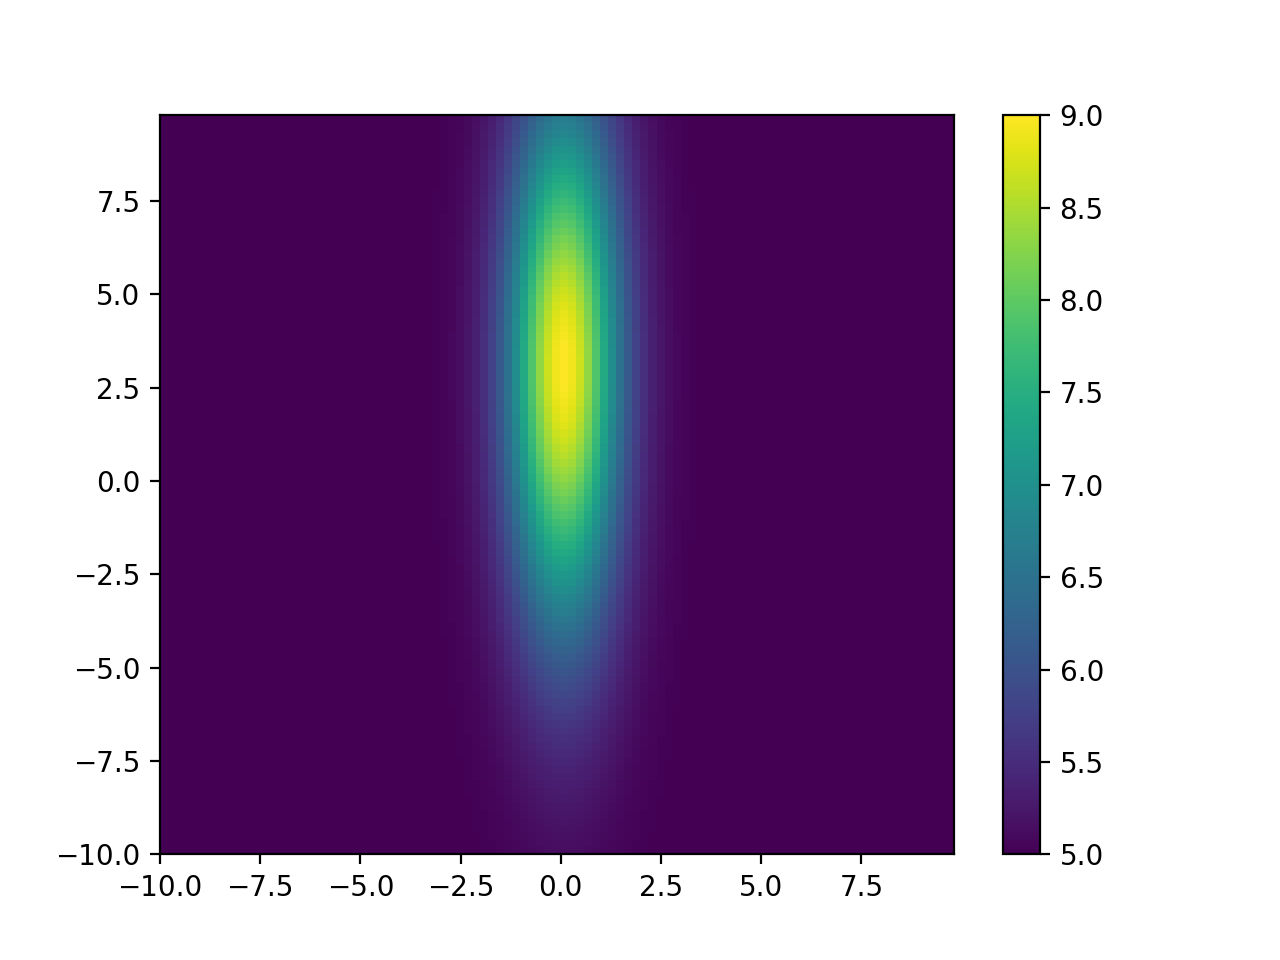

In [13]:
f1,ax=plt.subplots()
cax=ax.pcolor(xmat,ymat,G)
f1.colorbar(cax)

Make and plot test data


In [14]:
Gdat=Gauss2D(xmat.reshape(np.prod(xmat.shape)),ymat.reshape(np.prod(xmat.shape)),100,1,5,(np.pi/3.),0,3,5)
errGdat=np.sqrt(Gdat)
Gdatmin=Gdat-errGdat
rdat=np.random.rand(len(Gdat))
Gdat=Gdatmin+2*errGdat*rdat

In [15]:
Gdat

array([3.63717871, 5.74517644, 4.1359698 , ..., 5.85703864, 7.1274551 ,
       7.0140021 ])

<IPython.core.display.Javascript object>


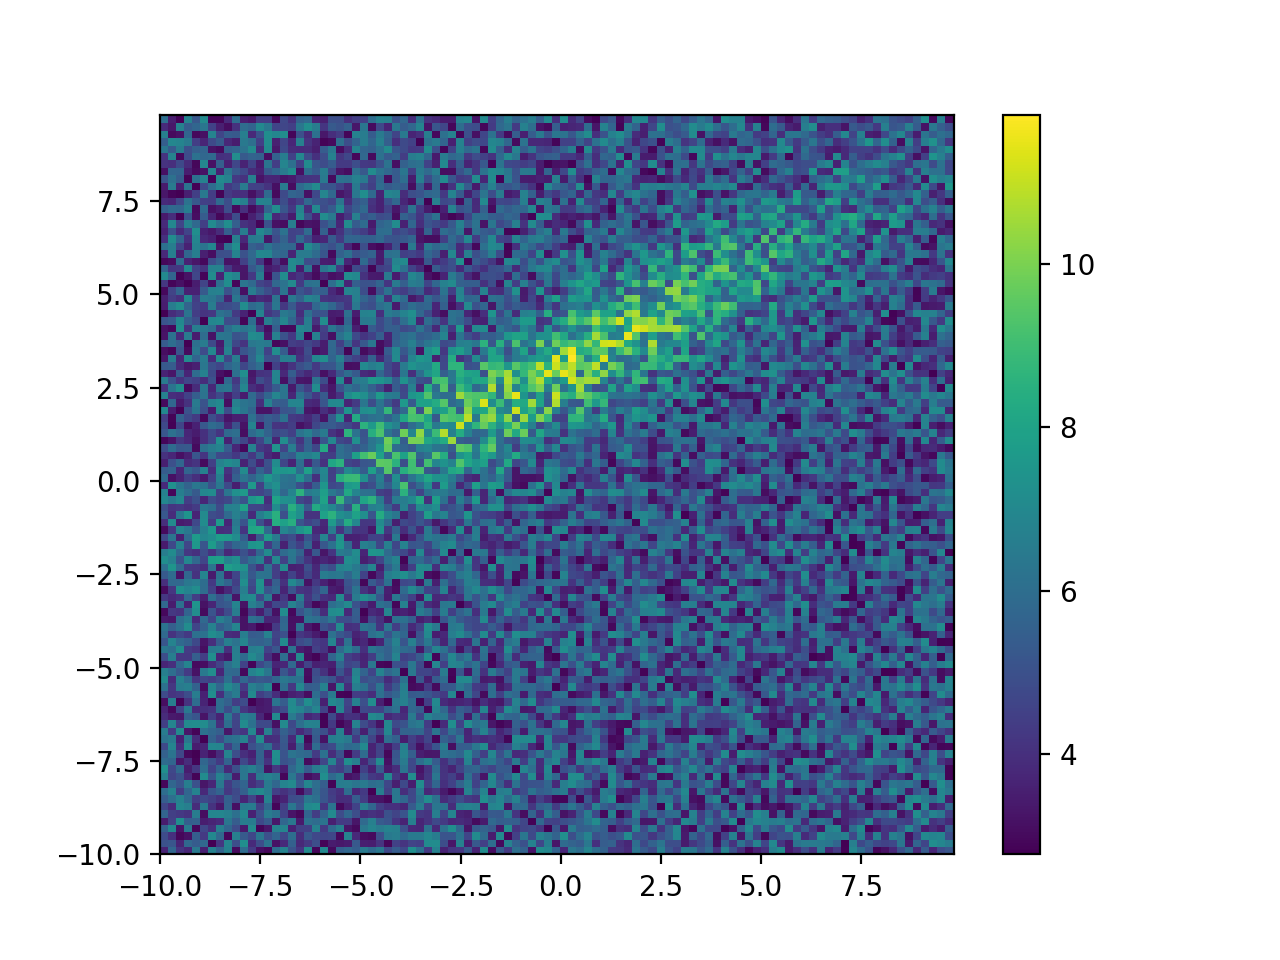

In [16]:
f2,ax2=plt.subplots()
cax=ax2.pcolor(xmat,ymat,Gdat.reshape(xmat.shape))
f2.colorbar(cax)

Declare Model

In [17]:
model=Model(Gauss2D,independent_vars=['x','y'])

In [18]:
model.set_param_hint('A',value=95)
model.set_param_hint('sig1',value=3)
model.set_param_hint('sig2',value=3)
model.set_param_hint('theta',value=0,min=0,max=np.pi/2.)
model.set_param_hint('cx',value=0)
model.set_param_hint('cy',value=0)
model.set_param_hint('b',value=5)

In [19]:
#result=model.fit(Gdat,x=xmat,y=ymat,weights=1./np.sqrt(Gdat))
result=model.fit(Gdat,x=xmat.reshape(np.prod(xmat.shape)),y=ymat.reshape(np.prod(ymat.shape)),weights=1./np.sqrt(Gdat))

In [20]:
print(result.fit_report())


[[Model]]
    Model(Gauss2D)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 77
    # data points      = 10000
    # variables        = 7
    chi-square         = 3532.33845
    reduced chi-square = 0.35348128
    Akaike info crit   = -10392.2499
    Bayesian info crit = -10341.7775
[[Variables]]
    A:      99.0617088 +/- 5.88152325 (5.94%) (init = 95)
    sig1:   0.98600259 +/- 0.03093878 (3.14%) (init = 3)
    sig2:   5.00530528 +/- 0.15895497 (3.18%) (init = 3)
    theta:  1.05305063 +/- 0.00918018 (0.87%) (init = 0)
    cx:     0.13102816 +/- 0.13446784 (102.63%) (init = 0)
    cy:     3.10353233 +/- 0.08146217 (2.62%) (init = 0)
    b:      4.65531945 +/- 0.01494807 (0.32%) (init = 5)
[[Correlations]] (unreported correlations are < 0.100)
    C(cx, cy)      =  0.904
    C(A, sig2)     =  0.697
    C(A, sig1)     =  0.683
    C(A, b)        = -0.437
    C(sig1, b)     = -0.284
    C(sig2, b)     = -0.228
    C(sig2, theta) =  0.106
    C(sig1, theta) =

<IPython.core.display.Javascript object>


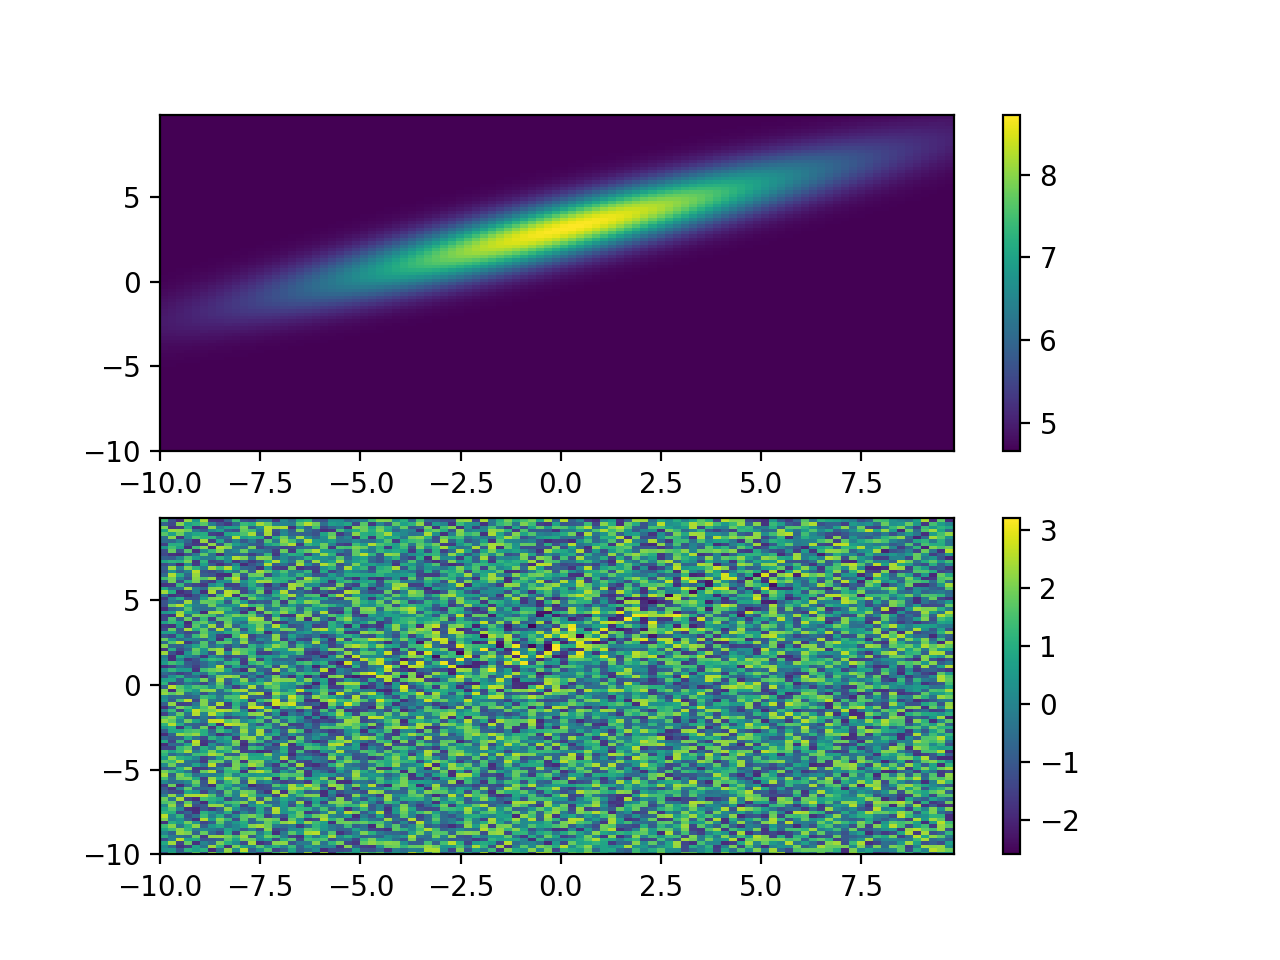

In [21]:
f3,ax3=plt.subplots(2,1)
c0=ax3[0].pcolor(xmat,ymat,result.best_fit.reshape(xmat.shape))
c1=ax3[1].pcolor(xmat,ymat,Gdat.reshape(xmat.shape)-result.best_fit.reshape(xmat.shape))
f3.colorbar(c0,ax=ax3[0])
f3.colorbar(c1,ax=ax3[1])